<a href="https://colab.research.google.com/github/8zali9/DeepLearning-PyTorch/blob/main/courseNotebooks/PyTorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **ML Model**
*What we are doing?*
1. (a) we set random values of weight (how much the connection of input layers to a single neuron influences) and bias.
2. (b) we then create a sample dataset of random values and then applied a linear regression formula.
3. (c) we then split the data into training and testing sets in the ratio of 8:2.
4. (d) we then create a function to plot the sample data to visualize
5. (e) we then create a LinearRegressionModel (explained there in detail)
6. (f) initializing the model

### (a).

we set random values of weight (how much the connection of input layers to a single neuron influences) and bias.

In [37]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.2.1+cu121'

### (b)

we then create a sample dataset of random values and then applied a linear regression formula.

In [38]:
# (a)
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim = 1)
y = weight * X + bias

In [39]:
print(f"X tensor:\n{X[:10]}\nwith the length: {len(X)}\n")
print(f"y vector:\n{y[:10]}\nwith the length: {len(y)}")

X tensor:
tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]])
with the length: 50

y vector:
tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260]])
with the length: 50


### (c)

we then split the data into training and testing sets in the ratio of 8:2.

In [40]:
train_split = int(0.8 * len(X))
train_X, train_y = X[:train_split], y[:train_split]
test_X, test_y = X[train_split:], y[train_split:]


plotting a scatter plot through matplotlib

### (d)

we then create a function to plot the sample data to visualize

In [41]:
def plot_scatter (
    train_data = train_X,
    train_labels = train_y,
    test_data = test_X,
    test_labels = test_y,
    predictions = None
    ) :
      plt.figure(figsize=(10, 7))

      plt.scatter(train_data, train_labels, c="b", s=5, label = "Training data")
      plt.scatter(test_data, test_labels, c="g", s=5, label = "Test data")

      if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=5, label = "Predictions")

      plt.legend(prop={"size": 14})

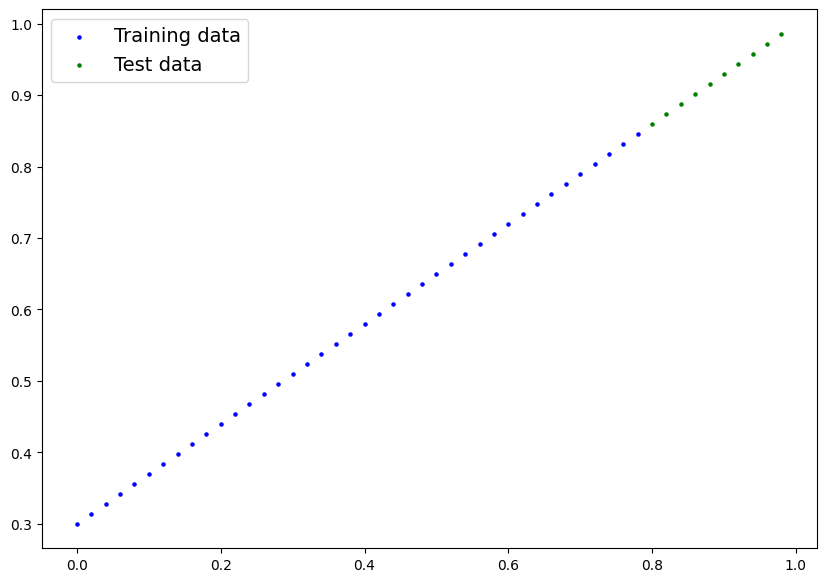

In [42]:
plot_scatter()

### (e)

we then create a LinearRegressionModel (explained there in detail)

*Details:*

`LinearRegressionModel` class  inherits `nn.Module` class

`def __init__(self)` : is a constructor

`super().__init__()` : calls the constructor of the parent class `nn.Module`. It ensures that the parent's class's methods are initialized first, before the child class initializes. If we hadn't done this, we were assuming that the methods are accessible from the parent class, although they are not even initialized.

The `self.weights` and the `self.bias` are initialized with random numbers. Afterwards, we have adjusted these values to represent or replicate those values which were set in step (a). This is done by a **gradient descent** approach (we find how can we make the cost function spit a lower and lower value; essentially saying finding the minima of the function).

```
def forward (self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias
```
Above code which has the forward function is a must for every class that inherits nn.Module class. This is because this class which inherits, acts as a hidden layer in the neural network, so it takes some input, and *forwards* it onto the next layer.


In [73]:
class LinearRegressionModel (nn.Module):
  def __init__(self):
    super().__init__()

    self.weights = nn.Parameter(
        torch.randn(
            1,
            requires_grad= True,
            dtype= torch.float
        )
      )

    self.bias = nn.Parameter(
        torch.randn(
            1,
            requires_grad=True,
            dtype = torch.float
        )
    )

  def forward (self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias

### (f)

initializing the model

In [74]:
torch.manual_seed(42)

model_0 = LinearRegressionModel()

list(model_0.parameters()) # shows the parameters present in the class
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

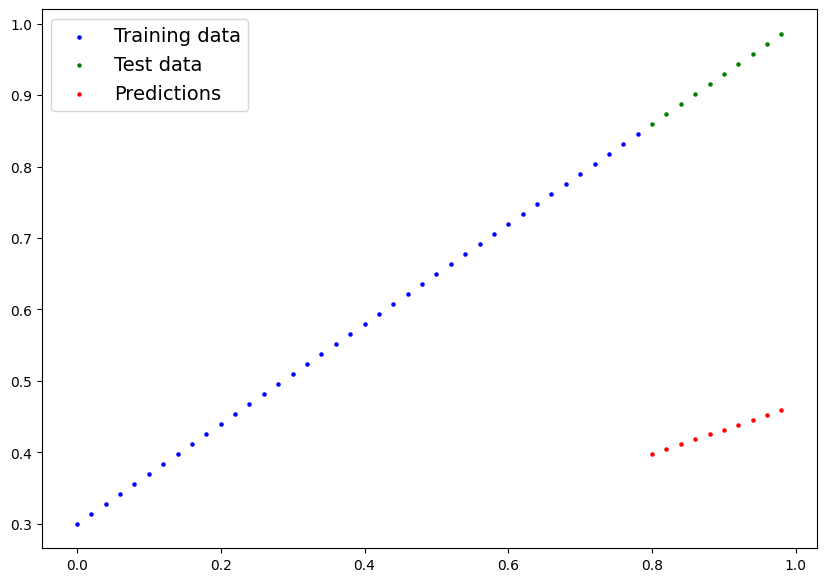

In [75]:
with torch.inference_mode(): # .inference_mode() is a context manager, which will evaluate the model without tracking the gradients, that reduces memory usage & improves computation
  y_preds = model_0(test_X)
  y_preds

plot_scatter(predictions=y_preds)

### (g)

Training the Model

setting the loss function and optimizer

Terms to remember ->
* loss function (which calculates for each data point, how much accurately the model predicts)
* cost function (does the same as loss function, but calculates for the overall dataset)
* optimizer (an algorithm that changes the parameters by taking loss / cost  function into account, i.e. the weights and biases, to make the model predict better)

In [76]:
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params = model_0.parameters(), lr = 0.01) # lr is the learning rate

### (f)

Training loop

In [84]:
epoch_count = []
train_loss_vals = []
test_loss_vals = []
epochs = 100

for epoch in range(epochs):
  # set the model to training mode
  model_0.train()

  # forward pass
  y_pred = model_0(train_X)

  # calculate the loss
  loss = loss_fn(y_pred, train_y)

  # optimizer zero grad
  optimizer.zero_grad()

  # backpropagation
  loss.backward()

  # make the optmizer takes steps to decrease the loss after each pass
  optimizer.step()

  # testing
  model_0.eval()
  with torch.inference_mode():
    # forward pass
    test_preds = model_0(test_X)

    # calculate the loss
    test_loss = loss_fn(test_preds, test_y)

    if epoch % 10 == 0:
      print(epoch)
      print (loss, test_loss)
      epoch_count.append(epoch)
      train_loss_vals.append(loss)
      test_loss_vals.append(test_loss)

print(model_0.state_dict())
print(loss)

0
tensor(0.0245, grad_fn=<MeanBackward0>) tensor(0.0565)
10
tensor(0.0210, grad_fn=<MeanBackward0>) tensor(0.0482)
20
tensor(0.0176, grad_fn=<MeanBackward0>) tensor(0.0406)
30
tensor(0.0142, grad_fn=<MeanBackward0>) tensor(0.0323)
40
tensor(0.0107, grad_fn=<MeanBackward0>) tensor(0.0241)
50
tensor(0.0073, grad_fn=<MeanBackward0>) tensor(0.0165)
60
tensor(0.0039, grad_fn=<MeanBackward0>) tensor(0.0082)
70
tensor(0.0089, grad_fn=<MeanBackward0>) tensor(0.0050)
80
tensor(0.0089, grad_fn=<MeanBackward0>) tensor(0.0050)
90
tensor(0.0089, grad_fn=<MeanBackward0>) tensor(0.0050)
OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])
tensor(0.0026, grad_fn=<MeanBackward0>)


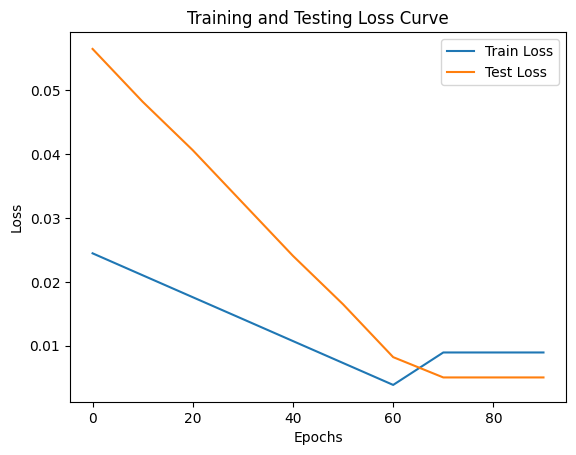

In [87]:
# plotting loss curves
plt.plot(epoch_count, torch.tensor(train_loss_vals).numpy(), label = "Train Loss")
plt.plot(epoch_count, test_loss_vals, label = "Test Loss")
plt.title("Training and Testing Loss Curve")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

In [95]:
with torch.inference_mode():
  y_preds_new = model_0(test_X)

print(model_0.state_dict())

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])


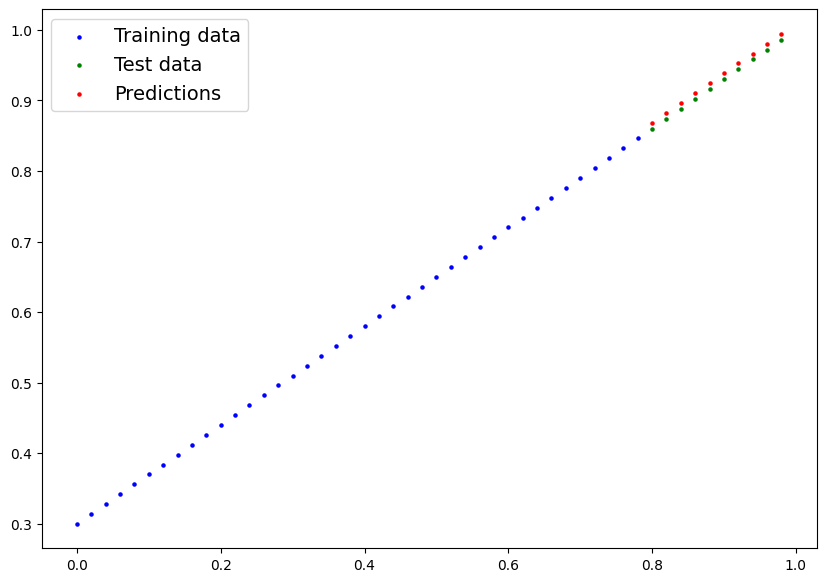

In [86]:
plot_scatter(predictions = y_preds_new)

### (h)

Saving model

In [90]:
from pathlib import Path

modelDir = Path('models')
modelDir.mkdir(parents=True, exist_ok=True)

modelName = "PyTorch_Workflow_Model_0.pth"
modelPath = modelDir / modelName

torch.save(obj=model_0.state_dict(), f=modelPath)

### (i)

Loading model

In [92]:
loadedModel_0 = LinearRegressionModel()

loadedModel_0.load_state_dict(torch.load(f=modelPath))

LinearRegressionModel()

In [98]:
loadedModel_0.eval()
with torch.inference_mode():
  loadedModel_0_pred = loadedModel_0(test_X)

loadedModel_0_pred == y_preds

tensor([[False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False]])